# Decision trees and random forest classification

In this project I use decision trees and random forest classification to classify database of irses and urine samples.

Accuracy (mean):  0.9666666666666668


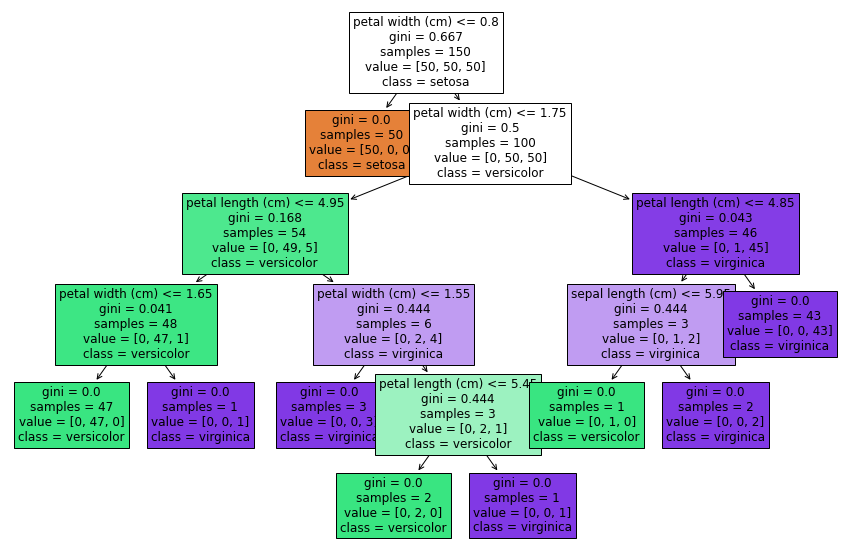

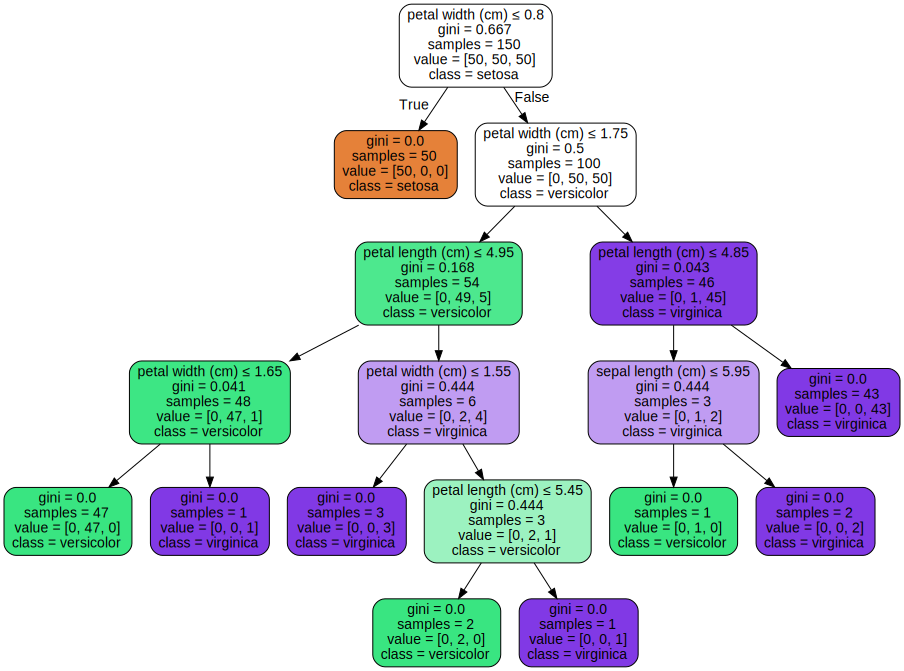

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=5)
print('Accuracy (mean): ', scores.mean())

plt.figure(figsize=(15,10))
tree.plot_tree(clf, fontsize=12, filled=True, feature_names=iris.feature_names, class_names = iris.target_names)
plt.show()

import graphviz

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded = True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("DTiris")
graph

   pregnant  glusoce  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1
Accuracy (train):  1.0
Accuracy (test):  0.6623376623376623
Accuracy (train):  1.0
Accuracy (test):  0.7748917748917749


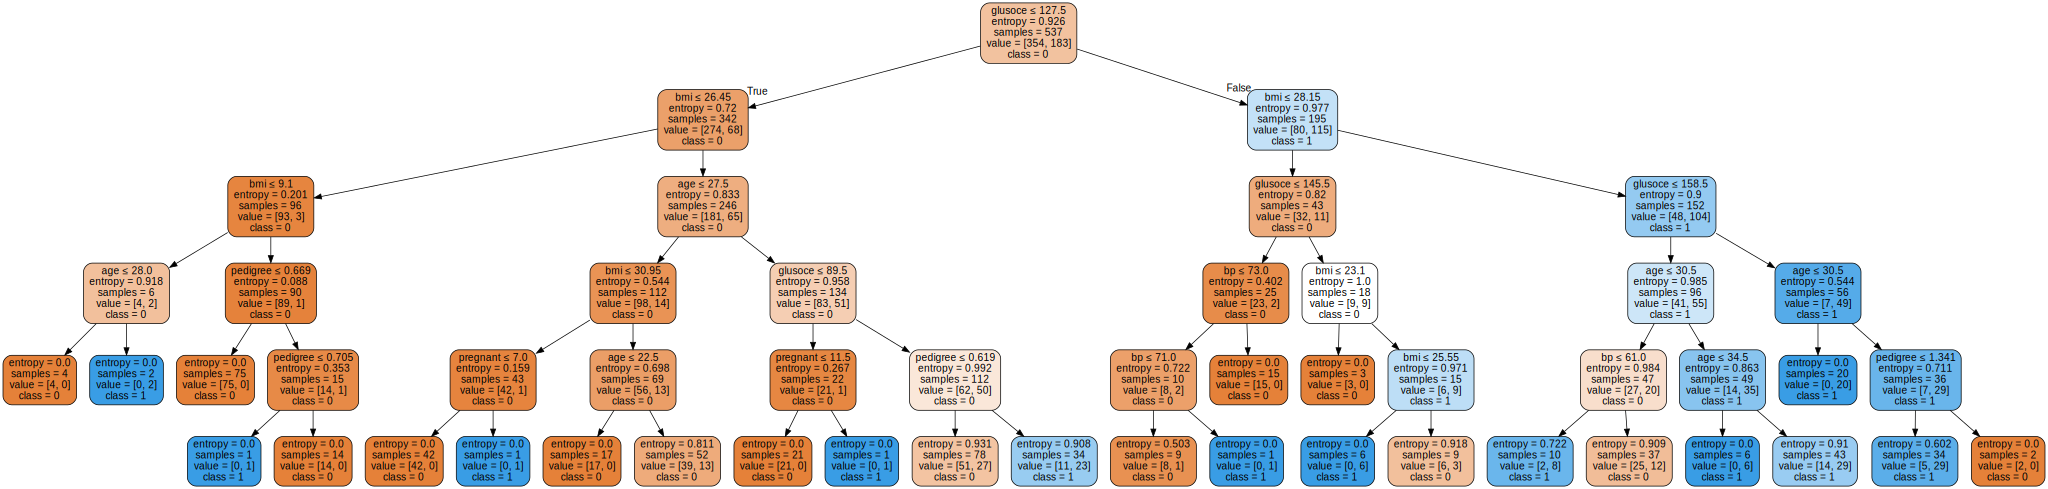

In [ ]:
%matplotlib inline
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

col_names = ['pregnant', 'glusoce', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('diabetes(1).csv', header = 0, names = col_names)
print(pima.head())

feature_cols = ['pregnant', 'insulin', 'bmi','age', 'glusoce', 'bp', 'pedigree']
X = pima[feature_cols]
y = pima.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=1)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_trian_pred = clf.predict(X_train)
print("Accuracy (train): ", metrics.accuracy_score(y_train, y_trian_pred))
y_pred = clf.predict(X_test)
print("Accuracy (test): ", metrics.accuracy_score(y_test, y_pred))

import graphviz
dot_data = tree.export_graphviz(clf, out_file = None, feature_names=feature_cols, class_names=['0','1'], filled = True, rounded = True, special_characters=True)
graph = graphviz.Source(dot_data, format='png')
graph.render('DTdiabetes')
graph

clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf = clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
print("Accuracy (train): ", metrics.accuracy_score(y_train, y_trian_pred))
y_pred = clf.predict(X_test)
print("Accuracy (test): ", metrics.accuracy_score(y_test, y_pred))
dot_data = tree.export_graphviz(clf, out_file = None, feature_names=feature_cols, class_names=['0','1'], filled = True, rounded = True, special_characters=True)
graph = graphviz.Source(dot_data, format='png')
graph.render('DTdiabetes3')
graph

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Accuracy (test):  0.9736842105263158

 Predicted species  setosa  versicolor  virginica
Actual species                                  
setosa                 14           0          0
versicolor              0          13          1
virginica               0           0         10

Feature importances
sepal length (cm) = 0.04903893913508162
sepal width (cm) = 0.02017170011713555
petal length (cm) = 0.6248144310544562
petal width (cm) = 0.3059749296933267




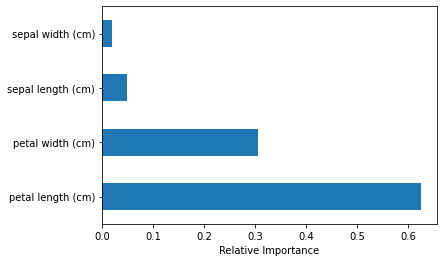

[[14  0  0]
 [ 0 13  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

0.9736842105263158

Predicted class probabilities
[[0.  1.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.  0.9 0.1]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  0.3 0.7]]


In [ ]:
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(df.head())
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25)

clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('\nAccuracy (test): ', metrics.accuracy_score(y_test, y_pred))
classes = iris.target_names[clf.predict(X_test)]
names = iris.target_names[y_test]
print('\n', pd.crosstab(names, classes, rownames=['Actual species'], colnames=['Predicted species']))
print('\nFeature importances')

for name, importance in zip(iris["feature_names"], clf.feature_importances_):
  print(name, "=", importance)

print('\n')
importances = pd.Series(clf.feature_importances_, index=df.columns)
importances.nlargest(4).plot(kind='barh')
plt.xlabel('Relative Importance')
plt.show()

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

print('\nPredicted class probabilities')
print(clf.predict_proba(X_test[0:10]))

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]
Accuracy (test):  0.7878787878787878

Confusion Matrix:
[[132  14]
 [ 35  50]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84       146
         1.0       0.78      0.59      0.67        85

    accuracy                           0.79       231
   macro avg       0.79      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231


All AUC scores (CV):
[0.79185185 0.84148148

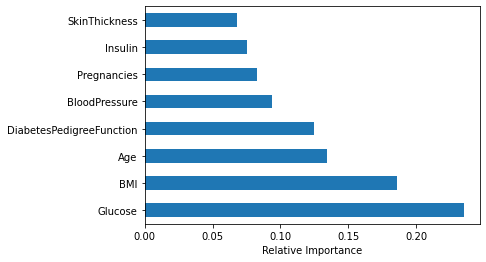

In [ ]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix

pima = pd.read_csv('diabetes.csv')
print(pima.head())
X = pima.values[:, 0:8]
y = pima.values[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=1)

clf = RandomForestClassifier(criterion='entropy', n_estimators=100, min_samples_split=5)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy (test): ", metrics.accuracy_score(y_test, y_pred))

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

score = cross_val_score(clf, X, y, cv=10, scoring = 'roc_auc')
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAll AUC scores (CV):")
print(score)
print("\nMean AUC Score: ",score.mean())
print('\n')
importances = pd.Series(clf.feature_importances_, index=pima.keys()[0:8])
importances.nlargest(8).plot(kind='barh')
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

digits = load_digits()

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=1)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_trian_pred = clf.predict(X_train)
print("Accuracy (train): ", metrics.accuracy_score(y_train, y_trian_pred))
y_pred = clf.predict(X_test)
print("Accuracy (test): ", metrics.accuracy_score(y_test, y_pred))

clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=9)
clf = clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=5)
print('Accuracy (mean): ', scores.mean())

dot_data = tree.export_graphviz(clf, out_file=None, class_names=str(digits.target_names), filled=True, rounded = True, special_characters=True)
graph = graphviz.Source(dot_data, format='png')
graph.render("DTdigitsimage")
graph

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

Accuracy (train):  1.0
Accuracy (test):  0.8555555555555555
Accuracy (mean):  0.8141535128443207
[[54  0  1  0  0  0  0  0  4  0]
 [ 0 42  1  1  2  0  0  1  2  0]
 [ 0  0 43  1  0  0  2  0  3  0]
 [ 0  0  1 47  0  1  1  2  3  9]
 [ 0  2  1  0 54  1  0  0  1  2]
 [ 0  0  0  0  0 43  1  0  0  3]
 [ 0  0  0  0  4  0 47  0  0  0]
 [ 0  1  0  1  2  0  0 51  0  2]
 [ 0  1  3  0  0  2  0  0 38  2]
 [ 0  6  0  2  0  3  0  1  2 43]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        59
           1       0.81      0.86      0.83        49
           2       0.86      0.88      0.87        49
           3       0.90      0.73      0.81        64
           4       0.87      0.89      0.88        61
           5       0.86      0.91      0.89        47
           6       0.92      0.92      0.92        51
           7       0.93      0.89      0.91        57
           8       0.72      0.83      0.77        46
           9       0.70      0.

In [ ]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_digits


digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=1)


clf = RandomForestClassifier(criterion='entropy', n_estimators=100, min_samples_split=6)
clf.fit(X_train, y_train)

y_trian_pred = clf.predict(X_train)
print("Accuracy (train): ", metrics.accuracy_score(y_train, y_trian_pred))
y_pred = clf.predict(X_test)
print("Accuracy (test): ", metrics.accuracy_score(y_test, y_pred))

classes = digits.target_names[clf.predict(X_test)]
names = digits.target_names[y_test]
print('\n', pd.crosstab(names, classes, rownames=['Actual digits'], colnames=['Predicted digits']))

print('\n',classification_report(y_test, y_pred))

Accuracy (train):  1.0
Accuracy (test):  0.975925925925926

 Predicted digits   0   1   2   3   4   5   6   7   8   9
Actual digits                                           
0                 57   0   0   0   2   0   0   0   0   0
1                  0  48   0   0   0   1   0   0   0   0
2                  0   0  49   0   0   0   0   0   0   0
3                  0   0   0  62   0   1   0   0   1   0
4                  0   0   0   0  61   0   0   0   0   0
5                  0   0   0   0   0  46   0   0   0   1
6                  0   0   0   0   0   0  51   0   0   0
7                  0   0   0   0   0   0   0  56   0   1
8                  0   0   0   0   0   1   0   1  43   1
9                  0   0   0   1   0   2   0   0   0  54

               precision    recall  f1-score   support

           0       1.00      0.97      0.98        59
           1       1.00      0.98      0.99        49
           2       1.00      1.00      1.00        49
           3       0.98      0.97   